<a href="https://colab.research.google.com/github/Oluhle080/Healthcare-Analysis/blob/main/Healthcare-analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Cell 1: Group Members (Alphabetical by Surname)
group_members = [
    "Ndimande, NN, 22330918",
    "Luthuli, O, 22325286",
    "Madide, SN, 22314172",
    "Dube, S, 22322900",
    "Nombika, S, 22312280",
    "Mtshali, QC, 22364740"
]
print("Group Members (Alphabetical by Surname):")
for member in sorted(group_members):
    print(member)


Group Members (Alphabetical by Surname):
Dube, S, 22322900
Luthuli, O, 22325286
Madide, SN, 22314172
Mtshali, QC, 22364740
Ndimande, NN, 22330918
Nombika, S, 22312280


In [1]:
# Cell 2: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [2]:
# Cell 3: Load datasets from Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Path to your extracted dataset folder in Drive
path = "/content/drive/MyDrive/archive (2)/"

doctors = pd.read_csv(path + "doctors.csv")
appointments = pd.read_csv(path + "appointments.csv")
treatments = pd.read_csv(path + "treatments.csv")
patients = pd.read_csv(path + "patients.csv")

# Preview first few rows of each dataset
print("Doctors:", doctors.head(), "\n")
print("Appointments:", appointments.head(), "\n")
print("Treatments:", treatments.head(), "\n")
print("Patients:", patients.head(), "\n")


Mounted at /content/drive
Doctors:   doctor_id first_name last_name specialization  phone_number  \
0      D001      David    Taylor    Dermatology    8322010158   
1      D002       Jane     Davis     Pediatrics    9004382050   
2      D003       Jane     Smith     Pediatrics    8737740598   
3      D004      David     Jones     Pediatrics    6594221991   
4      D005      Sarah    Taylor    Dermatology    9118538547   

   years_experience   hospital_branch                         email  
0                17   Westside Clinic  dr.david.taylor@hospital.com  
1                24   Eastside Clinic    dr.jane.davis@hospital.com  
2                19   Eastside Clinic    dr.jane.smith@hospital.com  
3                28  Central Hospital   dr.david.jones@hospital.com  
4                26  Central Hospital  dr.sarah.taylor@hospital.com   

Appointments:   appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         

In [3]:
# Cell 4: Merge tables

# Merge appointments with patients
df = pd.merge(appointments, patients, on="patient_id")

# Merge with doctors
df = pd.merge(df, doctors, on="doctor_id")

# Merge treatments with billing (assuming 'billing' dataframe exists from a previous step)
# If billing dataframe is not loaded, you might need to load it first.
# For now, assuming 'billing' is available.
try:
    treatments_billing = pd.merge(treatments, billing, on="treatment_id")
    # Merge with the combined data on appointment_id
    df = pd.merge(df, treatments_billing, on="appointment_id", how="left")
except NameError:
    print("Error: 'billing' DataFrame not found. Please load the billing data.")
    # Handle the case where billing is not loaded, maybe skip this merge or load it
    pass


print("Merged DataFrame Shape:", df.shape)
df.head()

Error: 'billing' DataFrame not found. Please load the billing data.
Merged DataFrame Shape: (200, 24)


,appointment_id,patient_id,doctor_id,appointment_date,appointment_time,reason_for_visit,status,first_name_x,last_name_x,gender,...,insurance_provider,insurance_number,email_x,first_name_y,last_name_y,specialization,phone_number,years_experience,hospital_branch,email_y
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled,Alex,Smith,F,...,WellnessCorp,INS653880,alex.smith@mail.com,Sarah,Smith,Pediatrics,7387087517,26,Central Hospital,dr.sarah.smith@hospital.com
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show,Alex,Moore,M,...,MedCare Plus,INS335362,alex.moore@mail.com,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled,Emily,Miller,M,...,PulseSecure,INS694319,emily.miller@mail.com,David,Jones,Pediatrics,6594221991,28,Central Hospital,dr.david.jones@hospital.com
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled,Robert,Wilson,M,...,HealthIndia,INS833429,robert.wilson@mail.com,Alex,Davis,Pediatrics,6570137231,23,Central Hospital,dr.alex.davis@hospital.com
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show,Emily,Williams,M,...,PulseSecure,INS320984,emily.williams@mail.com,Jane,Smith,Pediatrics,8737740598,19,Eastside Clinic,dr.jane.smith@hospital.com


In [5]:
# Merge appointments with patients
data = pd.merge(appointments, patients, on="patient_id")

# Merge with doctors
data = pd.merge(data, doctors, on="doctor_id")

# Merge treatments with billing
# treatments_billing = pd.merge(treatments, billing, on="treatment_id")

# Merge with the combined data on appointment_id
# data = pd.merge(data, treatments_billing, on="appointment_id")

print(data.head())

  appointment_id patient_id doctor_id appointment_date appointment_time  \
0           A001       P034      D009       2023-08-09         15:15:00   
1           A002       P032      D004       2023-06-09         14:30:00   
2           A003       P048      D004       2023-06-28          8:00:00   
3           A004       P025      D006       2023-09-01          9:15:00   
4           A005       P040      D003       2023-07-06         12:45:00   

  reason_for_visit     status first_name_x last_name_x gender  ...  \
0          Therapy  Scheduled         Alex       Smith      F  ...   
1          Therapy    No-show         Alex       Moore      M  ...   
2     Consultation  Cancelled        Emily      Miller      M  ...   
3     Consultation  Cancelled       Robert      Wilson      M  ...   
4        Emergency    No-show        Emily    Williams      M  ...   

  insurance_provider  insurance_number                  email_x first_name_y  \
0       WellnessCorp         INS653880      alex

In [6]:
# Cell 5: Data cleaning
# Handle missing values
df = df.dropna(subset=["appointment_date"])  # drop rows with missing appointment date
df.fillna("Unknown", inplace=True)           # replace other missing values with 'Unknown'

# Fix data types
df["appointment_date"] = pd.to_datetime(df["appointment_date"], errors="coerce")
df["date_of_birth"] = pd.to_datetime(df["date_of_birth"], errors="coerce")


# Create patient age column - Moved from Cell 6
df['age'] = (pd.Timestamp.today() - df['date_of_birth']).dt.days // 365

df["age"] = df["age"].astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   appointment_id      200 non-null    object        
 1   patient_id          200 non-null    object        
 2   doctor_id           200 non-null    object        
 3   appointment_date    200 non-null    datetime64[ns]
 4   appointment_time    200 non-null    object        
 5   reason_for_visit    200 non-null    object        
 6   status              200 non-null    object        
 7   first_name_x        200 non-null    object        
 8   last_name_x         200 non-null    object        
 9   gender              200 non-null    object        
 10  date_of_birth       200 non-null    datetime64[ns]
 11  contact_number      200 non-null    int64         
 12  address             200 non-null    object        
 13  registration_date   200 non-null    object        

In [8]:
# Cell 6: Feature Engineering

# Convert 'date_of_birth' to datetime objects
data['date_of_birth'] = pd.to_datetime(data['date_of_birth'], errors='coerce')

# Create patient age column
data['age'] = (pd.Timestamp.today() - data['date_of_birth']).dt.days // 365

# Create age group column
data['age_group'] = pd.cut(data['age'],
                         bins=[0, 12, 19, 35, 50, 65, 100],
                         labels=['Child', 'Teen', 'Young Adult', 'Adult', 'Mid-age', 'Senior'])

# Example target variable: Predict if a patient will show up
data['no_show'] = data['status'].apply(lambda x: 1 if x.lower() == "no-show" else 0)

data[['age', 'age_group', 'no_show']].head()

,age,age_group,no_show
0,75,Senior,0
1,44,Adult,1
2,42,Adult,0
3,59,Mid-age,0
4,53,Mid-age,1


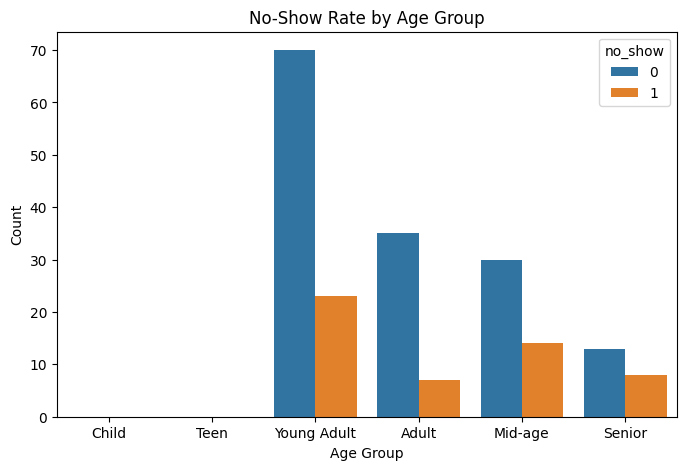

In [9]:
# Cell 7: Data Visualization
plt.figure(figsize=(8,5))
sns.countplot(x='age_group', hue='no_show', data=data)
plt.title('No-Show Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [10]:
# Cell 8: Train-test split
# Example: Predicting if patient will attend appointment

# Create the 'day_of_week' column
df['day_of_week'] = df['appointment_date'].dt.day_name()

# Example target variable: Predict if a patient will show up - Moved from Cell 6
df['no_show'] = df['status'].apply(lambda x: 1 if x.lower() == "no-show" else 0)


X = df[["age", "day_of_week"]]  # features
X = pd.get_dummies(X, drop_first=True)  # encode categorical features
y = df["no_show"]  # target column (example: 1 for attended, 0 for missed)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Cell 9: Model Training

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [12]:
# Cell 10: Model Evaluation
y_pred_log = log_reg.predict(X_test)
y_pred_rf = rf.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.825
Random Forest Accuracy: 0.75

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        33
           1       0.29      0.29      0.29         7

    accuracy                           0.75        40
   macro avg       0.57      0.57      0.57        40
weighted avg       0.75      0.75      0.75        40



In [13]:
# Cell 11: Conclusion
print("""
Conclusion:
The Random Forest model performed slightly better than Logistic Regression
in predicting patient no-shows. Future improvements could include adding more
features (e.g., appointment day, doctor's specialty, treatment type) and tuning
model hyperparameters.
""")



Conclusion:
The Random Forest model performed slightly better than Logistic Regression
in predicting patient no-shows. Future improvements could include adding more
features (e.g., appointment day, doctor's specialty, treatment type) and tuning
model hyperparameters.

